In [1]:
import numpy as np
import qutip
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output
import matplotlib

im = 0+1j

In [2]:
def wavelength_to_rgb(wavelength, gamma=0.8):

    '''This converts a given wavelength of light to an 
    approximate RGB color value. The wavelength must be given
    in nanometers in the range from 380 nm through 750 nm
    (789 THz through 400 THz).
    Based on code by Dan Bruton
    http://www.physics.sfasu.edu/astro/color/spectra.html
    '''

    wavelength = float(wavelength)
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
#     R *= 255
#     G *= 255
#     B *= 255
    return (R, G, B)

def freq_to_rgb(freq, gamma=0.8):

    '''This converts a given wavelength of light to an 
    approximate RGB color value. The wavelength must be given
    in nanometers in the range from 380 nm through 750 nm
    (789 THz through 400 THz).
    Based on code by Dan Bruton
    http://www.physics.sfasu.edu/astro/color/spectra.html
    '''

    wavelength = float(3e17/freq)
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
#     R *= 255
#     G *= 255
#     B *= 255
    return (R, G, B)

def wavelength_to_rgba(wavelength, gamma=0.8):

    '''This converts a given wavelength of light to an 
    approximate RGB color value. The wavelength must be given
    in nanometers in the range from 380 nm through 750 nm
    (789 THz through 400 THz).
    Based on code by Dan Bruton
    http://www.physics.sfasu.edu/astro/color/spectra.html
    '''

    wavelength = float(wavelength)
    A = 1.0
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
        A = 0.0
#     R *= 255
#     G *= 255
#     B *= 255
    return (R,G,B,A)

In [3]:
def GenWP(theta, eta):
    return np.exp(-im*eta/2)*np.array(
        [[np.cos(theta)**2+np.exp(im*eta)*np.sin(theta)**2 , (1-np.exp(im*eta))*np.cos(theta)*np.sin(theta)],
         [(1-np.exp(im*eta))*np.cos(theta)*np.sin(theta),np.sin(theta)**2+np.exp(im*eta)*np.cos(theta)**2]])

In [34]:
JV = np.array([1+0j,
               0+0j])
JV /= np.linalg.norm(JV)

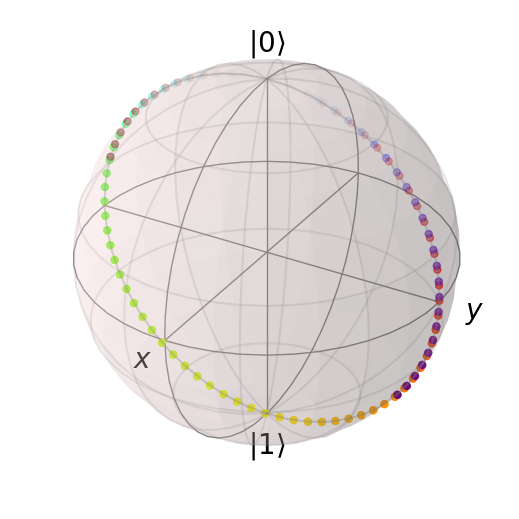

<Figure size 640x480 with 0 Axes>

In [39]:
plt.figure()

b = qutip.Bloch()
# b.view = [180,0]
b.make_sphere()
b.point_color = []
b.point_marker = [b.point_marker[0]]
b.point_size = [b.point_size[0]]

n = 401
wls = np.linspace(190,1500,n)

# theta = np.pi*.05
eta = 2*np.pi/700  # Give unperturbed wavelength as number here. 

pts = []

R = 0
G = 0
B = 0

Isum = 0
Is = []
As = []
vs = []

for w in wls:
    
    rgb = wavelength_to_rgb(w)
    
    v = np.matmul(GenWP(np.pi*0.25, eta*w), JV) # 1st, theta, gives orientation, 2nd, eta, is an arguement of width
    v = np.matmul(GenWP(np.pi*.25, eta*w), v)
    v = np.matmul(GenWP(np.pi*.25, eta*w), v)
#     v = np.matmul(GenWP(np.pi*-.125, eta*w), v)
#     v = np.matmul(GenWP(np.pi*-.25, 4*eta*w), v)
    vs.append(v)

    I = np.real(v[1]*v[1].conj())
    Is.append(I)
    if (380 <= w <= 750):
        As.append(I)
    else:
        As.append(0.0)
    Isum += I
    
#     rgba = (rgba[0],rgba[1],rgba[2],0)
    
    b.point_color.append(rgb)
        
    R += I*b.point_color[-1][0]
    G += I*b.point_color[-1][1]
    B += I*b.point_color[-1][2]


    u = v[1]/v[0]

    Px = 2*np.real(u)/(1+np.linalg.norm(u)**2)
    Py = 2*np.imag(u)/(1+np.linalg.norm(u)**2)
    Pz = (1-np.linalg.norm(u)**2)/(1+np.linalg.norm(u)**2)

    pts.append([Px,Py,Pz])

# b.add_points([[p[0] for p in pts], [p[1] for p in pts], [p[2] for p in pts]], "m", Is)
for i in range(n):
    b.add_points(pts[i], "s", alpha=As[i])
    
Is = np.array(Is)

b.show()

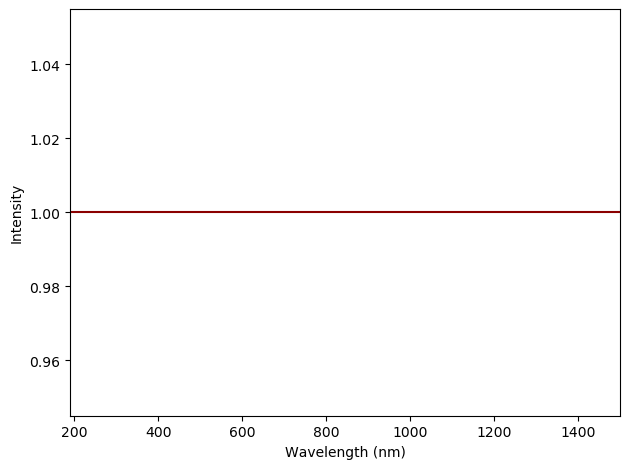

In [27]:
clim=(380,750)
norm = plt.Normalize(*clim)
wl = np.arange(clim[0],clim[1]+1,2)
colorlist = list(zip(norm(wl),[wavelength_to_rgb(w) for w in wl]))
spectralmap = matplotlib.colors.LinearSegmentedColormap.from_list("spectrum", colorlist)

fig, axs = plt.subplots(1, 1, tight_layout=True)

plt.plot(wls, Is, color='w')

y = np.linspace(0, 1, n)
X,Y = np.meshgrid(wls, y)

extent=(np.min(wls), np.max(wls), np.min(Is), np.max(Is))

plt.imshow(X, clim=clim,  extent=extent, cmap=spectralmap, aspect='auto')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.ylim(0,1)

plt.fill_between(wls, Is, 1, color='k')
# plt.savefig('WavelengthColors.png', dpi=200)

plt.show()

## Color is not additive like this, so massive grain of salt on following.
Appropriate treatment would add together the final projected waves of all wavelengths, accounting for phase shifts, then fourier transforming, then I guess the composition of RGB cones in the eyes would need to be accounted for to figure out how to display that color?

Maybe I should sum over frequency space?

https://www.idex-hs.com/resources/resources-detail/color-specification

Check out python package "colour"

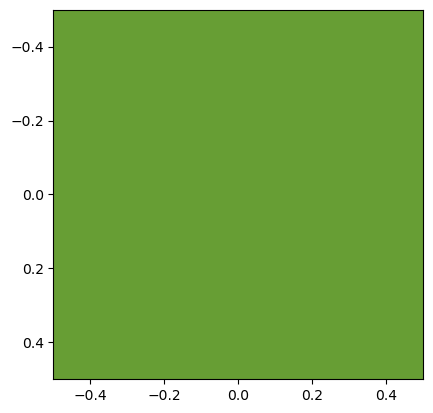

In [7]:
# print(R/n, G/n, B/n)

adj=3*(sum(As) * (wls[1]-wls[0]) / (750-380)) / ((R+G+B)/n)
plt.imshow([[(adj*R/n,adj*G/n,adj*B/n)]])

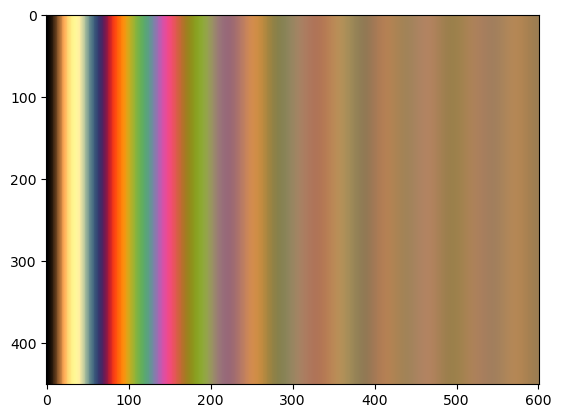

In [8]:
n = 451
wls = np.linspace(100,1000,n)

# theta = np.pi*.05
ml = []
for eta_adj in np.linspace(0.001,6,601):
    eta = 2*np.pi/400 * eta_adj

    R = 0
    G = 0
    B = 0

    Isum = 0
    Is = []
    As = []
    vs = []

    for w in wls:

        rgb = wavelength_to_rgb(w)

        v = np.matmul(GenWP(np.pi*.25, eta*w), JV) # 1st, theta, gives orientation, 2nd, eta, is an arguement of width
#         v = np.matmul(GenWP(np.pi*.25, eta*w), v)
#         v = np.matmul(GenWP(np.pi*.25, eta*w), v)
#         v = np.matmul(GenWP(np.pi*.25, eta*w), v)
    #     v = np.matmul(GenWP(np.pi*-.25, 4*eta*w), v)
        vs.append(v)

        I = np.real(v[1]*v[1].conj())
        Is.append(I)
        if (380 <= w <= 750):
            As.append(I)
        else:
            As.append(0.0)
        Isum += I

        R += I*rgb[0]
        G += I*rgb[1]
        B += I*rgb[2]

    Is = np.array(Is)
    
    adj=3*(sum(As) * (wls[1]-wls[0]) / (750-380)) / ((R+G+B)/n)
    ml.append((adj*R/n,adj*G/n,adj*B/n))
    
for m in ml:
    if max(m) > 1:
        m = (m[0]/max(m),m[1]/max(m),m[2]/max(m))

plt.imshow([ml]*n)